In [ ]:
import seaborn as sns

In [ ]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


total_bill : 총 요금

tip : 팁

sex : 성별

smoker : 흡연여부

day : 요일

time : 식사 시간

size : 식사 인원

In [ ]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [ ]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [ ]:
tips.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

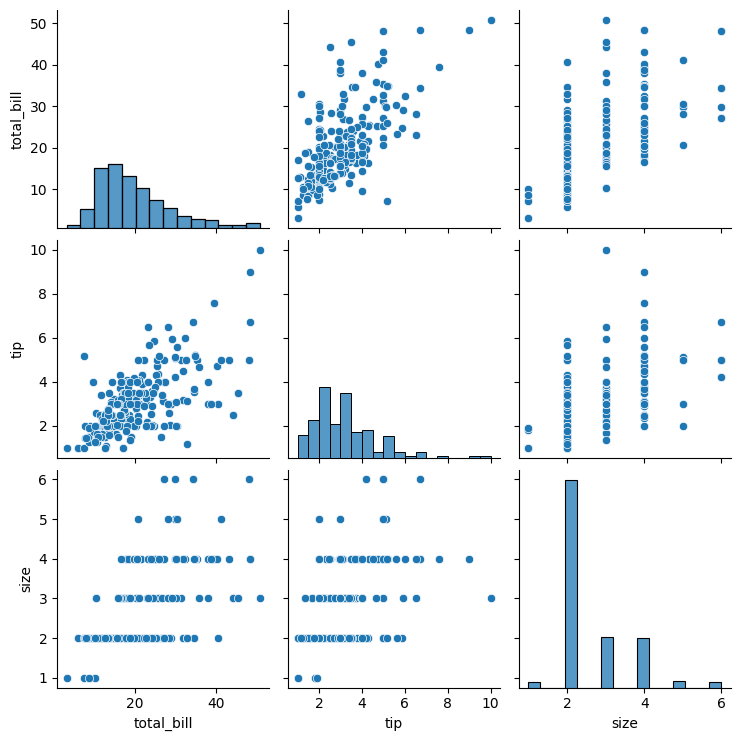

In [ ]:
sns.pairplot(tips)

<Axes: xlabel='day', ylabel='tip'>

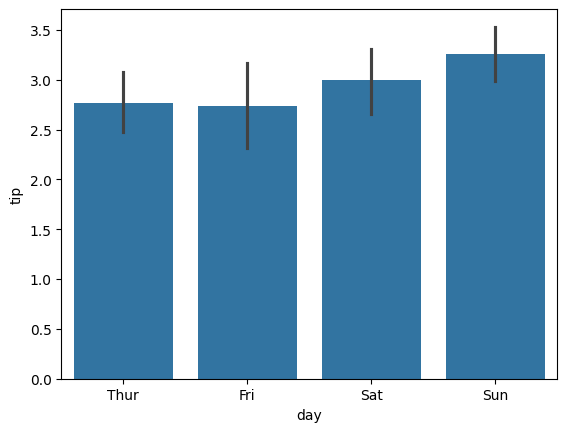

In [ ]:
# 요일별 팁
sns.barplot(data=tips, x="day", y="tip")

<Axes: xlabel='sex', ylabel='tip'>

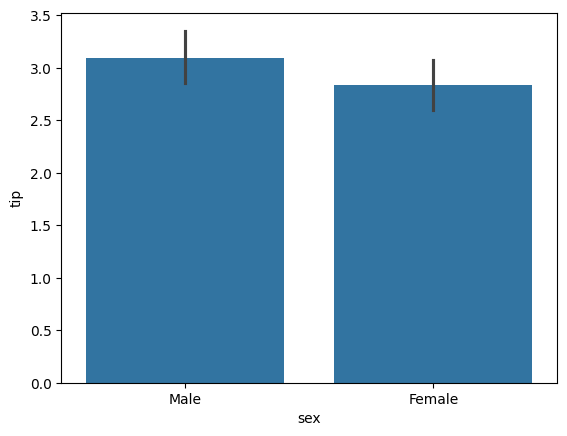

In [ ]:
# 성별 팁
sns.barplot(data=tips, x="sex", y="tip")

<Axes: xlabel='smoker', ylabel='tip'>

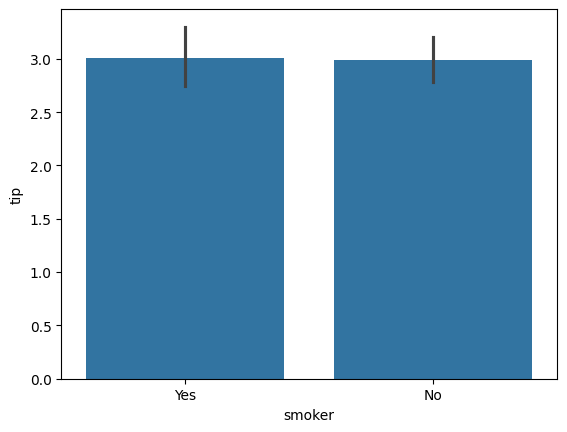

In [ ]:
# 흡연여부 별 팁
sns.barplot(data=tips, x="smoker", y="tip")

<Axes: xlabel='time', ylabel='tip'>

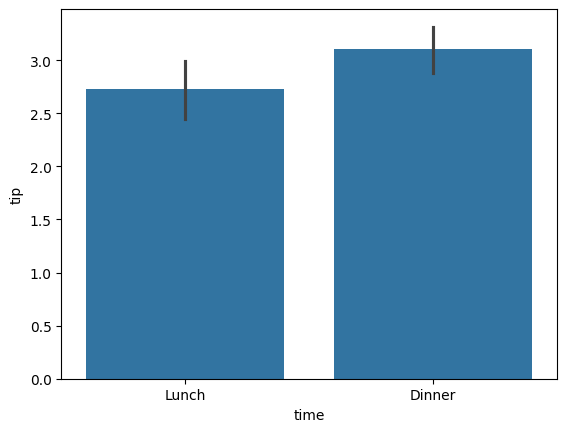

In [ ]:
# 식사시간 별 팁
sns.barplot(data=tips, x="time", y="tip")

<Axes: xlabel='size', ylabel='tip'>

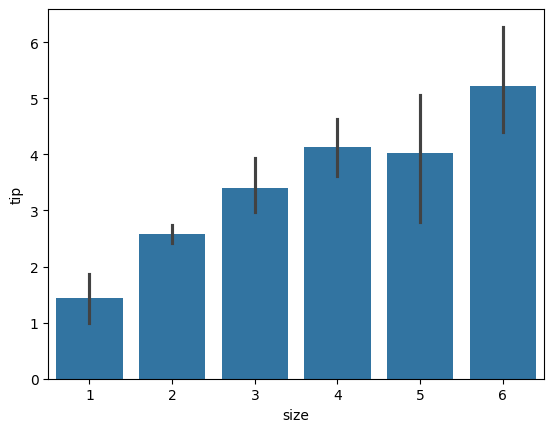

In [ ]:
# 식사인원 별 팁
sns.barplot(data=tips, x="size", y="tip")

In [ ]:
# 상관관계
corr = tips[["tip", "total_bill", "size"]].corr()
corr

,tip,total_bill,size
tip,1.000000,0.675734,0.489299
total_bill,0.675734,1.000000,0.598315
size,0.489299,0.598315,1.000000


<Axes: >

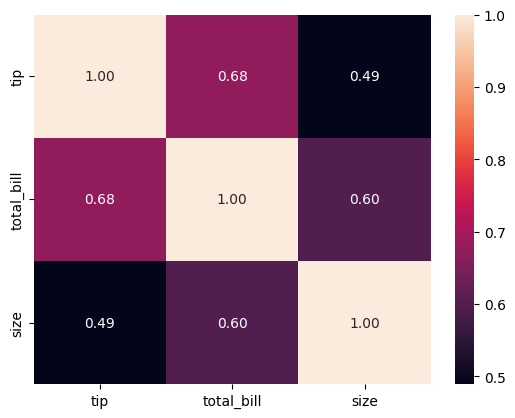

In [ ]:
# tip, total_bill, size -> heatmap
sns.heatmap(corr.values, annot=True,fmt=".2f",
            xticklabels=["tip", "total_bill", "size"], 
            yticklabels=["tip", "total_bill", "size"])

<Axes: xlabel='total_bill', ylabel='tip'>

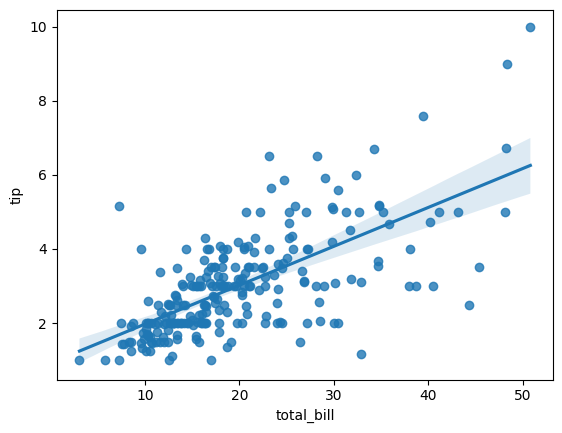

In [ ]:
sns.regplot(data=tips, x="total_bill", y="tip")

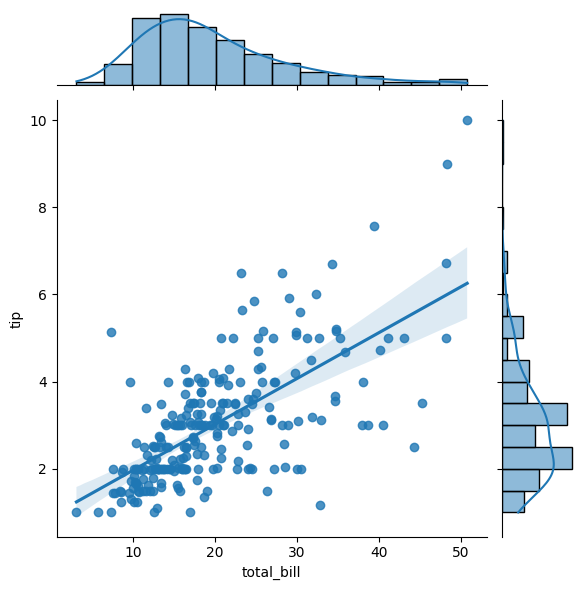

In [ ]:
sns.jointplot(data=tips, x="total_bill", y="tip", kind="reg")

In [ ]:
# 1.
x = tips[["total_bill"]]
y = tips[["tip"]]

print(x)
print(y)

     total_bill
0         16.99
1         10.34
2         21.01
3         23.68
4         24.59
..          ...
239       29.03
240       27.18
241       22.67
242       17.82
243       18.78

[244 rows x 1 columns]
      tip
0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
..    ...
239  5.92
240  2.00
241  2.00
242  1.75
243  3.00

[244 rows x 1 columns]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# 2.
# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
# 3. 모델 선택
model = LinearRegression()

In [ ]:
# 4. 모델 학습
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# 5.
predict = model.predict(x_test)
predict

array([[1.29124525],
       [2.87227083],
       [3.65825491],
       [2.41738632],
       [3.11178967],
       [1.76122548],
       [2.11345906],
       [3.08562375],
       [2.43952672],
       [3.45697858],
       [2.20604617],
       [1.99772517],
       [3.99438638],
       [3.51937424],
       [6.09571129],
       [3.2637533 ],
       [3.33017449],
       [2.0178528 ],
       [2.2593844 ],
       [3.71763143],
       [4.0155204 ],
       [2.77163267],
       [2.62470094],
       [3.31407238],
       [2.23321848],
       [2.05408254],
       [3.0443621 ],
       [3.52641891],
       [2.8632134 ],
       [4.00746935],
       [2.29058223],
       [4.04168632],
       [2.09131867],
       [4.58815156],
       [4.4875134 ],
       [2.33285026],
       [4.12924153],
       [2.82899642],
       [2.69011575],
       [2.10641439],
       [3.40565311],
       [3.0604642 ],
       [3.24563843],
       [2.49286495],
       [3.06448973],
       [3.89777374],
       [3.40364035],
       [4.530

In [ ]:
model.score(x_test, y_test)

0.43237661297854924

In [ ]:
# 총 요금이 30 달러인 경우에, 예상 팁은?
model.predict([[30]])

c:\Users\user\anaconda3\envs\multi02\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[4.00143106]])